In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import interpolate

%matplotlib inline
plt.style.use('seaborn')


# Down/upsample a time series

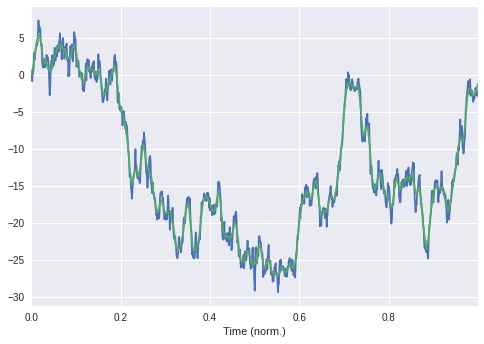

In [32]:
# Generating a smooth time series
N = 1000 # time points
k = 11 # k-point mean-smoothing kernel
timevec = np.arange(N)/N

tsO = np.cumsum( np.random.randn(N) )
ts  = np.convolve(tsO,np.ones(k)/k,mode='same')

plt.plot(timevec,tsO)
plt.plot(timevec,ts)
plt.xlim(timevec[[0,-1]])
plt.xlabel('Time (norm.)')
plt.show()

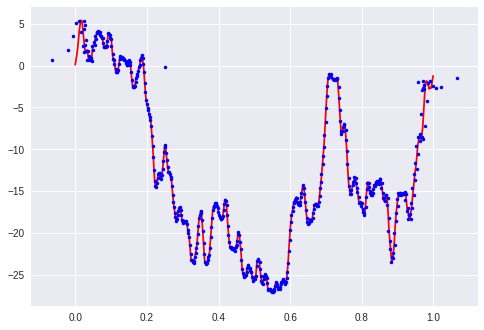

In [33]:
# downsample to 1/2 the original rate

ts_ds = signal.resample(ts,int(N/2))
timevec_ds = signal.resample(timevec,int(N/2))

plt.plot(timevec,ts,'r')
plt.plot(timevec_ds,ts_ds,'b.')
# plt.xlim([.5,.56])
plt.show()

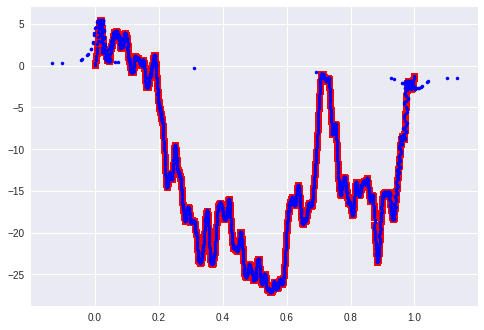

In [34]:
# upsample to 3x the original rate

ts_us = signal.resample(ts,int(N*3))
timevec_us = signal.resample(timevec,int(N*3))

plt.plot(timevec,ts,'rs')
plt.plot(timevec_us,ts_us,'b.')
# plt.xlim([.6,.605])
plt.show()

# 1D interpolation

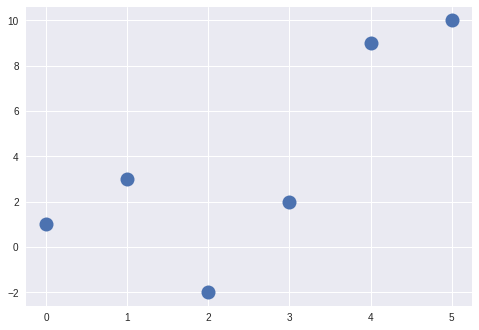

In [35]:
# Create signal
sig = np.array([ 1,3,-2,2,9,10 ])

plt.plot(sig,'o',markersize=14)
plt.show()

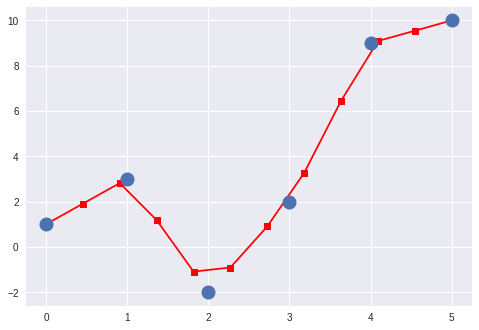

In [36]:
interp_factor = 2

orig_points = np.arange(len(sig))
interp_points = np.linspace(0,len(sig)-1,int(len(sig)*interp_factor))

interp_sig = np.interp(interp_points,orig_points,sig)

plt.plot(interp_points,interp_sig,'rs-')
plt.plot(orig_points,sig,'o',markersize=14)
plt.show()

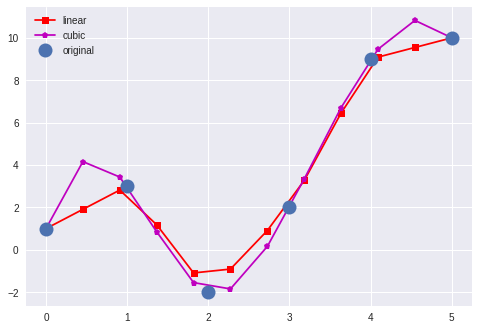

In [37]:
# using scipy

interp_factor = 2

interp_funL = interpolate.interp1d(orig_points,sig,bounds_error=False,kind='linear')
interp_funC = interpolate.interp1d(orig_points,sig,bounds_error=False,kind='cubic')
interp_sigL = interp_funL(interp_points)
interp_sigC = interp_funC(interp_points)

plt.plot(interp_points,interp_sigL,'rs-',label='linear')
plt.plot(interp_points,interp_sigC,'mp-',label='cubic')
plt.plot(orig_points,sig,'o',markersize=14,label='original')
plt.legend()
plt.show()

# 1D extrapolation

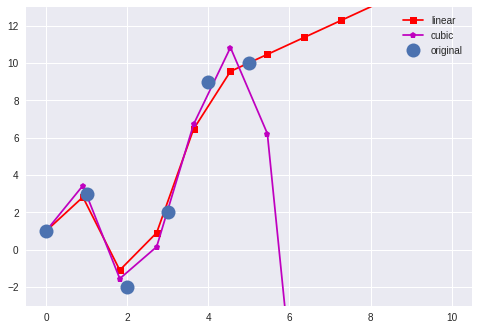

In [38]:
# extrapolation

interp_factor = 2

orig_points = np.arange(len(sig))
interp_points = np.linspace(0,(len(sig)-1)*2,int(len(sig)*interp_factor))

interp_funL = interpolate.interp1d(orig_points,sig,bounds_error=False,kind='linear',fill_value='extrapolate')
interp_funC = interpolate.interp1d(orig_points,sig,bounds_error=False,kind='cubic',fill_value='extrapolate')
interp_sigL = interp_funL(interp_points)
interp_sigC = interp_funC(interp_points)

plt.plot(interp_points,interp_sigL,'rs-',label='linear')
plt.plot(interp_points,interp_sigC,'mp-',label='cubic')
plt.plot(orig_points,sig,'o',markersize=14,label='original')
plt.legend()
plt.ylim([-3,13])
plt.show()

# Resampling 


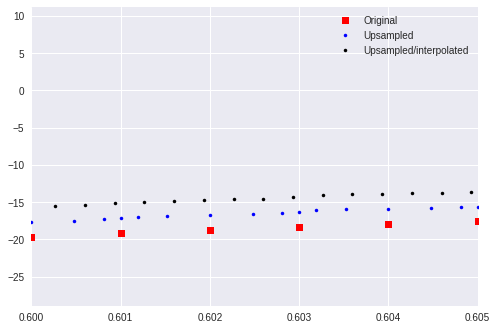

In [39]:
# linear interpolation of upsampled signal

interp_funL = interpolate.interp1d(timevec_us,ts_us,bounds_error=False,kind='linear')
timevec_usRegular = np.linspace(timevec[0],timevec[-1],len(timevec_us))

ts_usRegular = interp_funL(timevec_usRegular)


plt.plot(timevec,ts,'rs',label='Original')
plt.plot(timevec_us,ts_us+2,'b.',label='Upsampled')
plt.plot(timevec_usRegular,ts_usRegular+4,'k.',label='Upsampled/interpolated')
plt.xlim([.6,.605])
plt.legend()
plt.show()

# Fix corrupted image with interpolation

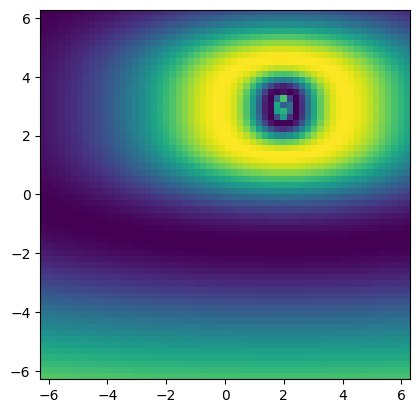

In [48]:
plt.style.use('default')
# create 2D function
x = np.linspace(-2*np.pi,2*np.pi,60)
X,Y = np.meshgrid(x,x)
Zgood = np.sin(np.log((X-2)**2 + np.abs((Y-3)**3)))

# visualize
plt.imshow(Zgood,extent=[x[0],x[-1],x[0],x[-1]],origin='top')
plt.show()

In [49]:
# select pixels to corrupt

prop_bad_pixels = .1

# total number of elements
num_elements = np.prod(Zgood.shape)

# random selection of pixels to trash
badpix_idx = np.random.rand(int(num_elements*prop_bad_pixels))*num_elements
badpix_idx = np.floor(badpix_idx).astype(int)
badpix_idx


array([2247, 1599, 1568,  201, 2848,  172, 2898, 1358, 1584,  247, 3399,
       3215,  643, 3162, 3476, 1983, 1285, 1068, 3456, 1971, 2279, 3491,
       2698, 2348, 2942, 2179, 2319, 2226, 1964, 1564, 3067, 1547, 3171,
       2638,  576, 1176, 1017, 3555, 3012, 2474, 2603,  280, 3068, 2147,
       2750,  300,  947,  472, 1304, 1673, 2957, 2064, 1121, 3473,  913,
       2961,  757,  784,  480, 3387, 1179, 2237, 1878, 3133, 2891, 3321,
       3151,  844, 1082, 1608,  305, 3037,  376,  420, 2559, 3579, 1845,
         17, 1243,  512, 3272, 1674, 2247,  939, 1873, 3461, 1866, 1052,
       2879,  764, 2670, 3152, 2350, 1023, 1686,  970, 2188, 1306, 1616,
       1158, 3497, 3566,   19, 1464, 2080, 1660, 2687,  333, 1086, 1588,
        384, 1545,  189,  320, 2883, 1198, 1260, 1332, 3044,  619,   77,
       3134, 2531,  123, 1158, 2830,   72, 1484, 1807, 2570, 1814, 1764,
       1881, 2160, 2480, 1973, 1642,  886,   82,  530, 3091, 3061, 2344,
       3083, 3182,  754, 2632, 2280, 2042, 1975, 13

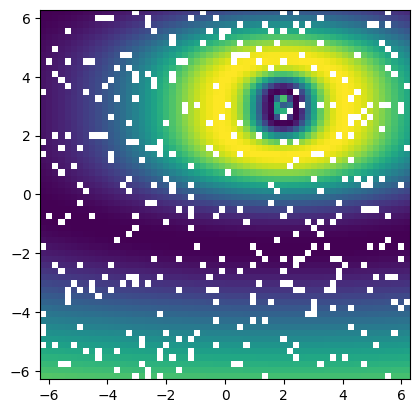

In [50]:
# destroy those pixels
Z = Zgood.copy()
Z[np.unravel_index(badpix_idx,Z.shape)] = np.nan

# or more explicitly:
badpix_i,badpix_j = np.unravel_index(badpix_idx,Z.shape)
Z[badpix_i,badpix_j] = np.nan


# visualize
plt.imshow(Z,extent=[x[0],x[-1],x[0],x[-1]],origin='top')
plt.show()

In [52]:
# find good and bad indices
badidx_i,badidx_j = np.where(np.isnan(Z))
gooidx_i,gooidx_j = np.where(np.isfinite(Z))

# interpolate using griddata
Znewpix = interpolate.griddata( (gooidx_i,gooidx_j),Z[np.isfinite(Z)],
                                (badidx_i,badidx_j) )

# replace the bad pixels
Zinterp = Z.copy()
Zinterp[badidx_i,badidx_j] = Znewpix

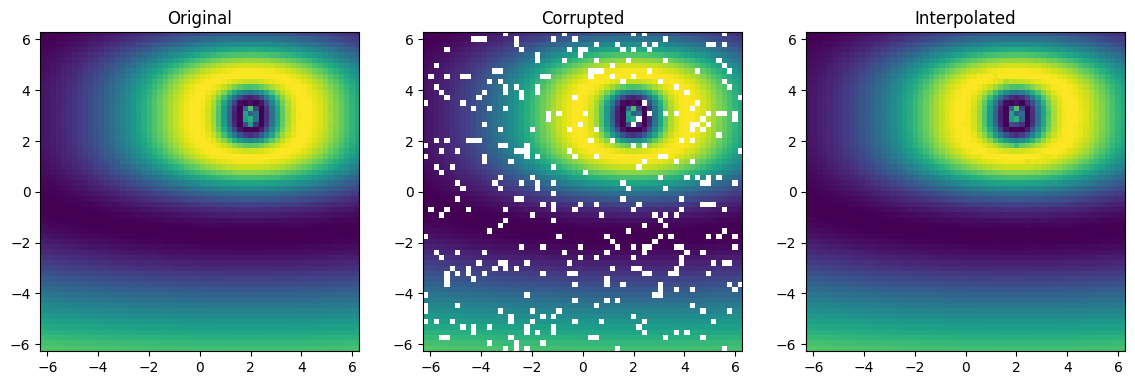

In [53]:
# visualization
fig,ax = plt.subplots(1,3,figsize=(14,7))
ax[0].imshow(Zgood,extent=[x[0],x[-1],x[0],x[-1]],origin='top')
ax[0].set_title('Original')

ax[1].imshow(Z,extent=[x[0],x[-1],x[0],x[-1]],origin='top')
ax[1].set_title('Corrupted')

ax[2].imshow(Zinterp,extent=[x[0],x[-1],x[0],x[-1]],origin='top')
ax[2].set_title('Interpolated')

plt.show()

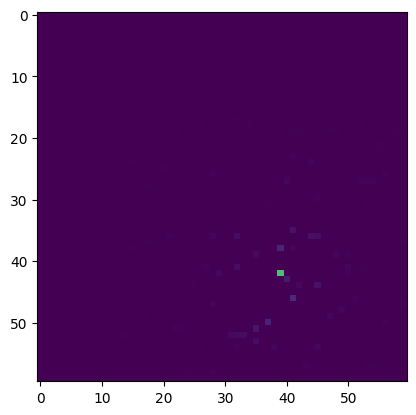

In [54]:
# show difference map
diffmap = np.abs(Zgood-Zinterp)

plt.imshow(diffmap,vmin=0,vmax=np.max(Zgood))
plt.show()